In [8]:
from matplotlib import pyplot as plt
from matplotlib import projections
from matplotlib import cm
import  numpy as np
from sympy import symbols, diff
import math
%matplotlib inline

# 3d charting
$f(x,y)=\frac{1}{3^{-x^2 - y^2}+1}$

In [9]:
def f(x,y):
    r=3**(-(x**2) - (y**2))
    return 1/(r+1)

In [10]:
# Make our x and our y 
x = np.linspace(start=-2, stop=2, num=200)
y = np.linspace(start=-2, stop=2, num=200)

x, y = np.meshgrid(x, y)

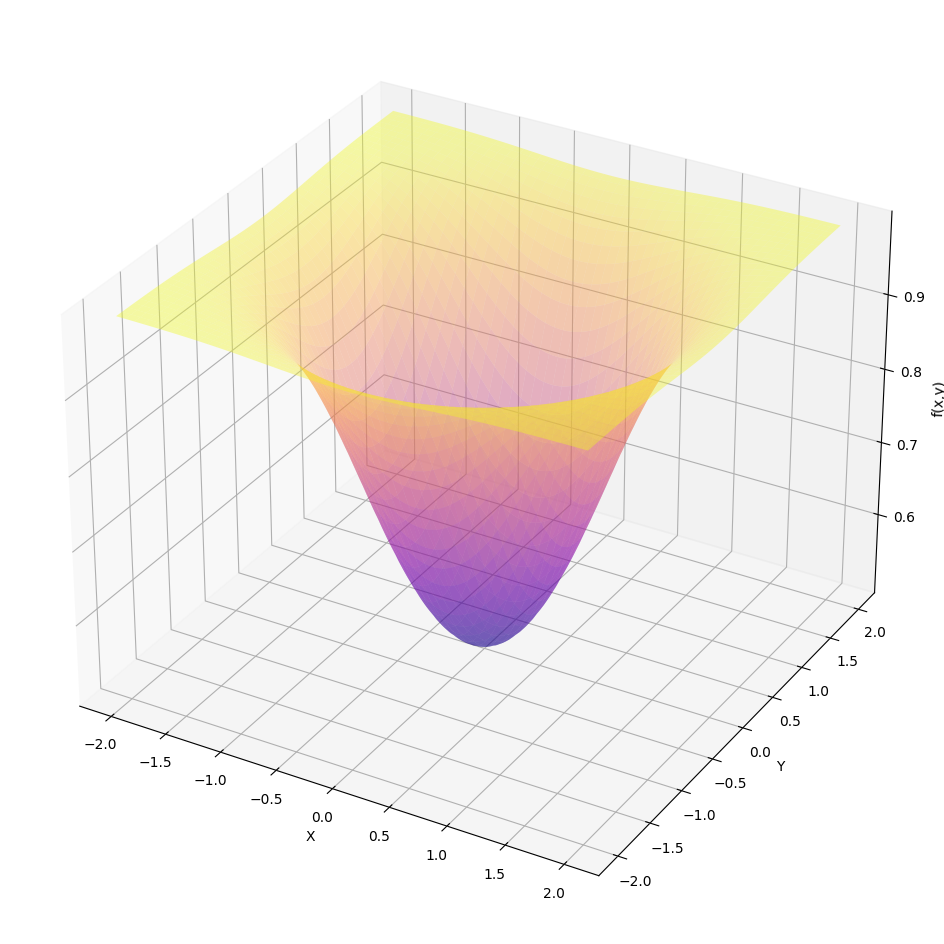

In [11]:
fig = plt.figure(figsize=[16, 12])
ax = plt.axes(projection='3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x,y)")

ax.plot_surface(x, y, f(x,y), cmap=cm.plasma, alpha=0.4)
plt.show()


# Partial derivatives and symbolic computation   
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{(3^{-x^2 - y^2} + 1)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{(3^{-x^2 - y^2} + 1)^2}$$

In [6]:
# Telling symbols to use 'a' as 'x', and 'b' as 'y'
a, b = symbols('x, y')
print(f"Our cost function f(x, y) is: {f(a, b)}")

print(f"Partial derivatice with respect to x is: {diff(f(a,b), a)}")

print(f"Value of f(x,y) at (1.8, 1.0) is:{f(a, b).evalf(subs={a: 1.8, b: 1.0})}")

print(f"Slope of partial derivative with respect to x at (1.8, 1.0) is:{diff(f(a,b), a).evalf(subs={a: 1.8, b: 1.0})}")

Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivatice with respect to x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at (1.8, 1.0) is:0.990604794032582
Slope of partial derivative with respect to x at (1.8, 1.0) is:0.0368089716197505


# batch gradient descent with sympy

In [12]:
def fpx(x: float, y: float) -> float:
    top_line = 2 * x * math.log(3) * 3**(-x**2 - y**2)
    bottom_line = (3**(-x**2 - y**2) + 1)**2
    return top_line/bottom_line

def fpy(x: float, y: float) -> float:
    top_line = 2 * y * math.log(3) * 3**(-x**2 - y**2)
    bottom_line = (3**(-x**2 -y**2) + 1)**2
    return top_line/bottom_line

In [15]:
multiplier =  0.1
max_iter = 500

# The initial guess
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplier * gradients)
print(f"Values in gradient array {gradients}")
print(f"Minimum occurs at x value of: {params[0]}")
print(f"Minimum occurs at y value of: {params[1]}")
print(f"The cost is {f(params[0], params[1])}")

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is 0.5


## Graphing 3d Gradient Descent and Adv Np arrays

In [27]:
multiplier =  0.1
max_iter = 500

# The initial guess
params = np.array([1.8, 1.0])
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplier * gradients)
    # values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2),), axis=0)

# Results
print(f"Values in gradient array {gradients}")
print(f"Minimum occurs at x value of: {params[0]}")
print(f"Minimum occurs at y value of: {params[1]}")
print(f"The cost is {f(params[0], params[1])}")

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is 0.5


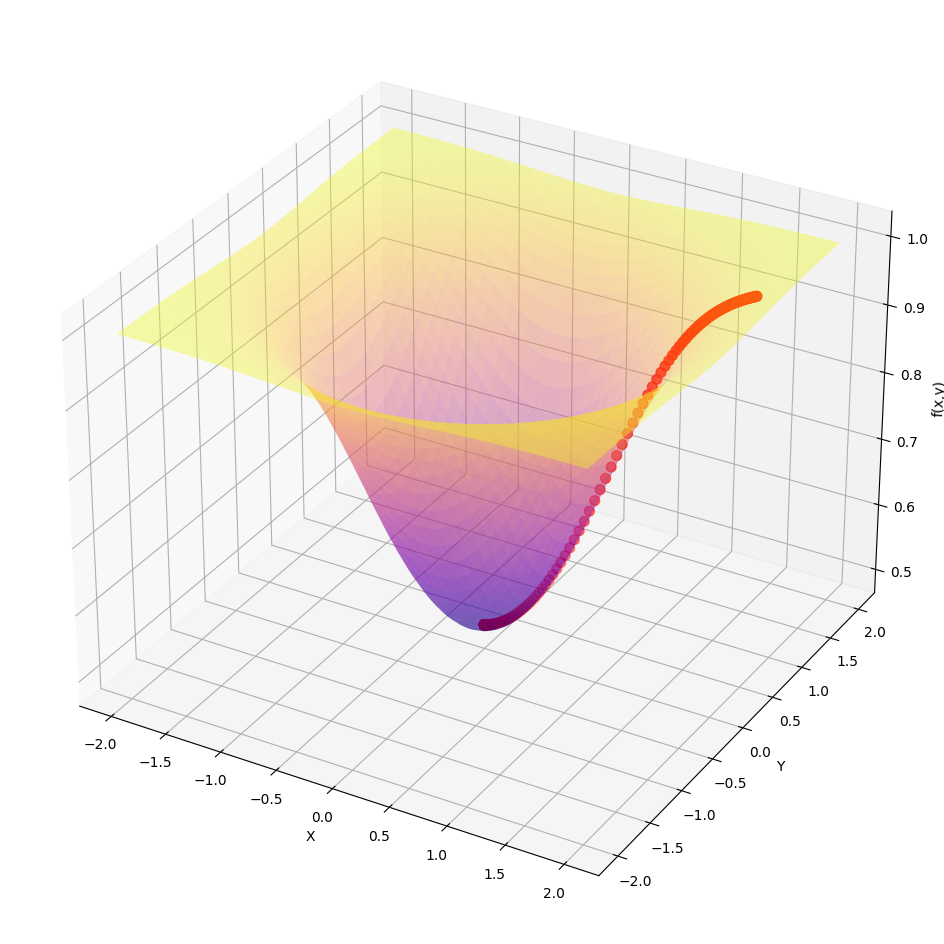

In [28]:
fig = plt.figure(figsize=[16, 12])
ax = plt.axes(projection='3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x,y)")

ax.plot_surface(x, y, f(x,y), cmap=cm.plasma, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')
plt.show()


# Example 5: Working with data and a real cost function
## Mean square Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{i}\big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{i}\big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y}\big)^2$$